### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [56]:
data = pd.read_csv('data/coupons.csv')

In [57]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [59]:
# Explore Data Unique Values in Every Dataframe coloumn
column_list = data.columns.values.tolist()
for column_name in column_list:
    print(column_name ,"", data[column_name].unique(), "\n")

destination  ['No Urgent Place' 'Home' 'Work'] 

passanger  ['Alone' 'Friend(s)' 'Kid(s)' 'Partner'] 

weather  ['Sunny' 'Rainy' 'Snowy'] 

temperature  [55 80 30] 

time  ['2PM' '10AM' '6PM' '7AM' '10PM'] 

coupon  ['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)'] 

expiration  ['1d' '2h'] 

gender  ['Female' 'Male'] 

age  ['21' '46' '26' '31' '41' '50plus' '36' 'below21'] 

maritalStatus  ['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'] 

has_children  [1 0] 

education  ['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School'] 

occupation  ['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Ser

2. Investigate the dataset for missing or problematic data.

In [60]:
#Get number of null values in each coloumn
data.isnull().sum().sort_values()

destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      130
CarryAway                 151
Restaurant20To50          189
CoffeeHouse               217
car                     12576
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [61]:
# Null Data Exploration Demonstrates Bar, RestaurantLessThan20, CarryAway, Restaurant20To50, CoffeeHouse and Car are main coloumns with large number of null values 
# replace null values with "Not Defined" , dropping them will let us lose a lot of rows 
data = data.fillna("Not Defined")

4. What proportion of the total observations chose to accept the coupon? 



In [62]:
# Print Ratio of Coupon Accepted Observation 
print ("Ratio of Accepted Coupon" , ":", data.query("Y == 1").shape[0]/data.shape[0])

Ratio of Accepted Coupon : 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

In [63]:
px.bar (data , x = "coupon", title = "Coupons Aviable in Data Set")

6. Use a histogram to visualize the temperature column.

(array([2316.,    0.,    0.,    0.,    0., 3840.,    0.,    0.,    0.,
        6528.]),
 array([30., 35., 40., 45., 50., 55., 60., 65., 70., 75., 80.]),
 <BarContainer object of 10 artists>)

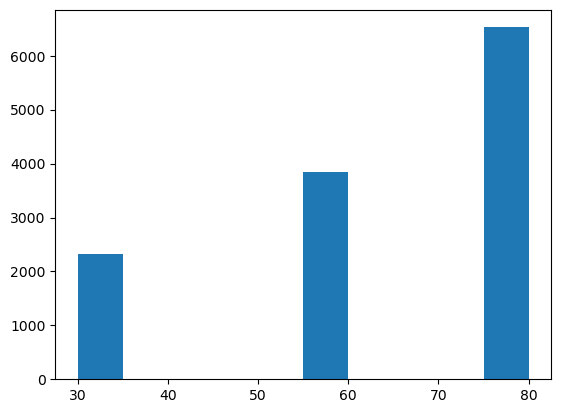

In [64]:
plt.hist(data= data, x= 'temperature')

#### Start Explore Accepted Coponus Driver Profiles
    Gender, Destination, Weather, Income Attributes for Accepted and Decline Coponus People

In [70]:
data['Accepted'] = data['Y']
data.replace({'Accepted' : {0 : "NO" ,  1 : "YES"}})
data['Accepted'] = data['Accepted'].astype(object)
px.histogram(data, x='destination', color= 'Accepted')

In [71]:
px.histogram(data, x='weather', color= 'Accepted')

In [107]:
px.histogram (data , x = "coupon", color = 'Accepted')

In [108]:
px.histogram(data, x='gender', color= 'Accepted')


In [93]:
px.histogram(data, x='age', color= 'Accepted')

In [112]:
px.histogram(data, x='income', color= 'Accepted')
#sns.displot (data, x='income', hue = 'Accepted')

# Conclusion 1:
- In the given dataset Coupons for Coffer Houses are largest followed by Cheap Resturants, then Carryout & Takeaways
- also in the data set temprature ranges in 35, 55, 75
- Drivers Accepted Coupons have the following attributes 
    - Majority have destination as "No Urgent Place"
    - Acceptance in sunny weather is common
    - Largest Ratio of Coupons  Acceptances go to Cheap Resturants
    - Ratio of Female/Male Acceptance to Coponus is almost close to each other
    - Ratio of Acceptance vs Rejection isvhigh for < 21 and 46 ages
    - Income is not affecting reject/accept the coponus as ratio of acceptance vs rejection is almost 50% across all income ranges

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [95]:
data_bar = data.query("coupon == 'Bar'")

2. What proportion of bar coupons were accepted?


In [96]:
print ("Ratio of Accepted Bar Coupon" , ":", data_bar.query("Y == 1").shape[0]/data_bar.shape[0])

Ratio of Accepted Bar Coupon : 0.41001487357461575


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [97]:
three_or_less = ['never', 'less1', '1~3']
more_than_three = ['gt8', '4~8']
var1= data_bar[data_bar['Bar'].isin(three_or_less)].query ("Y == 1").shape[0]
var2 = data_bar[data_bar['Bar'].isin(more_than_three)].query ("Y == 1").shape[0]
print("Acceptance Rate Between 3-or-fewer times vs more-than-three", ":", var1/var2)

Acceptance Rate Between 3-or-fewer times vs more-than-three : 4.352941176470588


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [101]:
#another attempt of drivers with Passengers no in Alone

more_than_25_age=['46' , '26' , '31' , '41' , '50plus' , '36']
more_than_once_bar = ['1~3', 'gt8', '4~8']
data_bar['Bar'].unique()
#driver = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
#print ("Acceptance Rate" , "is", ":", data_bar.query("Bar in @more_than_once_bar & age in @more_than_25_age & passanger in @driver & Y == 1").shape[0]/data_bar.query("Y == 1").shape[0])
print ("Acceptance Rate" , "is", ":", data_bar.query("Bar in @more_than_once_bar & age in @more_than_25_age  & Y == 1").shape[0]/data_bar.query("Y == 1").shape[0])

Acceptance Rate is : 0.35308343409915355


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [113]:
#here we consider driver with passangers value 'Alone' as if they do not have passangers
more_than_once_bar = ['1~3', 'gt8', '4~8']
driver = ['Friend(s)', 'Partner']
#print ("Acceptance Rate" , "is", ":", data_bar.query("Bar in @more_than_once_bar & passanger in @driver & occupation != 'Farming Fishing & Forestry' & Y == 1").shape[0]/data_bar.query("Y == 1").shape[0])
print ("Acceptance Rate" , "is", ":", data_bar.query("Bar in @more_than_once_bar & passanger != 'Kid(s)' & occupation != 'Farming Fishing & Forestry' & Y == 1").shape[0]/data_bar.query("Y == 1").shape[0])

Acceptance Rate is : 0.4752116082224909


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [114]:
more_than_once_bar = ['1~3', 'gt8', '4~8']
driver = ['Friend(s)', 'Partner']
age = ['21', '26', 'below21'] 
resturants_lst = ['4~8', 'gt8']
income_lst = ['$37500 - $49999', '$12500 - $24999','$25000 - $37499','Less than $12500']
#var3 = data_bar.query("(Bar in @more_than_once_bar & passanger in @driver & maritalStatus != 'Widowed' & Y == 1) | (Bar in @more_than_once_bar & age in @age & Y == 1) | (RestaurantLessThan20 in @resturants_lst & income in @income_lst & Y == 1)").shape[0]/data_bar.query("Y==1").shape[0]
var3 = data_bar.query("(Bar in @more_than_once_bar & passanger != 'Kid(s)' & maritalStatus != 'Widowed' & Y == 1) | (Bar in @more_than_once_bar & age in @age & Y == 1) | (RestaurantLessThan20 in @resturants_lst & income in @income_lst & Y == 1)").shape[0]/data_bar.query("Y==1").shape[0]
print("Acceptance Ratio", "is", ":" ,var3)


Acceptance Ratio is : 0.5525997581620314


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Conclusion2 
- Proportion of accepted bar coupons in our dataset is 40% 
- Acceptance rate among people go to bar 3 or more time per month is 4x the people go to bar less
- Bar Coupons Acceptance Ratio of Drivers go to bar more than a month and with age > 25 is ~35%
- Bar Coupons Acceptance Ratio for Drivers with no kids passengers and had occupations other than farming, fishing, or forestry ~ 47%
- Bar Coupons Acceptance Ratio for Drivers who used to go to bar more than once a month with no kids, not windowed, under age 30 and go to cheap resturants more than 4 times with income less than 50k --> 55%

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:
# Check Characteristics of CarryAway Accepted Coupons

In [120]:
data_carryaway = data.query ("coupon == 'Carry out & Take away'")
data_carryaway.head(50)
print ("Ratio of Carry out & Take away Accepted Coupons", ":", data_carryaway.query("Y ==1").shape[0]/data_carryaway.shape[0])

Ratio of Carry out & Take away Accepted Coupons : 0.7354784788967823


In [142]:
px.histogram(data_carryaway, x='destination', color= 'Accepted')

In [132]:
var4= data_carryaway.query ("destination != 'Work' & Y==1").shape[0]
var5 = data_carryaway.query("Y==1").shape[0]
print(var4, var5)
print ("Ratio of Carry out & Take away Accepted Coupons From Drivers not going to work", ":", var4/var5)

1261 1760
Ratio of Carry out & Take away Accepted Coupons From Drivers not going to work : 0.7164772727272727


<Axes: xlabel='passanger', ylabel='Y'>

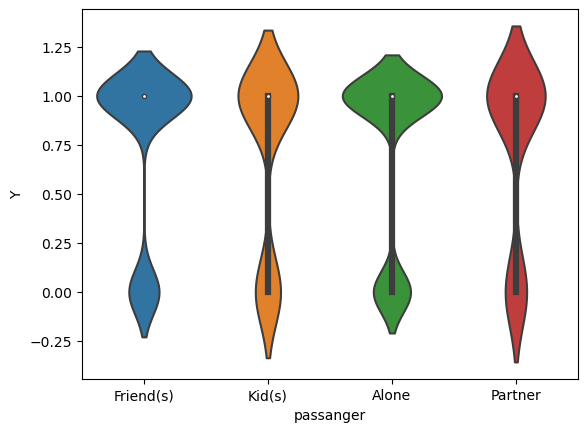

In [151]:
sns.violinplot(data = data_carryaway, y= 'Y', x= 'passanger')
#majority of accpetde coupons came with Alone and Friends

In [153]:
var4= data_carryaway.query ("(passanger == 'Alone' | passanger == 'Friend(s)') & Y==1").shape[0]
var5 = data_carryaway.query("Y==1").shape[0]
print(var4, var5)
print ("Ratio of Carry out & Take away Accepted Coupons From Drivers with no Passangers", ":", var4/var5)

1582 1760
Ratio of Carry out & Take away Accepted Coupons From Drivers with no Passangers : 0.8988636363636363


In [143]:
px.density_heatmap(data_carryaway,y="Accepted", x="age", marginal_x="histogram", marginal_y="histogram")
#High Acceptance occuers at age of 20, 26, 31

In [133]:
age_lst = ['21','26' , '31' , '36', 'below21'] 
var4= data_carryaway.query ("age in @age_lst & Y==1").shape[0]
var5 = data_carryaway.query("Y==1").shape[0]
print(var4, var5)
print ("Ratio of Carry out & Take away Accepted Coupons From Drivers less than 40", ":", var4/var5)

1251 1760
Ratio of Carry out & Take away Accepted Coupons From Drivers less than 40 : 0.7107954545454546


In [134]:
var4= data_carryaway.query ("maritalStatus != 'Married partner'  & Y==1").shape[0]
var5 = data_carryaway.query("Y==1").shape[0]
print(var4, var5)
print ("Ratio of Carry out & Take away Accepted Coupons From Drivers Not Married", ":", var4/var5)

1070 1760
Ratio of Carry out & Take away Accepted Coupons From Drivers Not Married : 0.6079545454545454


In [140]:
var4= data_carryaway.query ("(passanger == 'Alone' & Y==1) & (destination != 'Work' & Y==1) | (age in @age_lst & Y==1) | (maritalStatus != 'Married partner'  & Y==1)").shape[0]
var5 = data_carryaway.query("Y==1").shape[0]
print ("Ratio of Carry out & Take away Accepted Coupons From Drivers Not Going to work, driving a lone, less than 40 years and Not Married", ":", var4/var5)

Ratio of Carry out & Take away Accepted Coupons From Drivers Not Going to work, driving a lone, less than 40 years and Not Married : 0.8744318181818181


# Conclusion#3
- Perceptance of Acceptance of 'Carry out & Take away Coupons' is almost 73%
- Perceptance of Acceptance of 'Carry out & Take away Coupons' for drivers not going to work 70%
- Perceptance of Acceptance of 'Carry out & Take away Coupons' for drivers who drives a lone or with friends is 89%
- Perceptance of Acceptance of 'Carry out & Take away Coupons' for drivers with age , 40's is 71%
- Perceptance of Acceptance of 'Carry out & Take away Coupons' for drivers not married is 60%
- 87% of drivers accepting 'Carry out & Take away Coupons' are driving alone, not going to work or with age less than 40 or not married 
